<a href="https://colab.research.google.com/github/RozaSekouri/DA-projects/blob/main/Lung_cancer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:


from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving lung_cancer.csv to lung_cancer (1).csv
User uploaded file "lung_cancer (1).csv" with length 29744127 bytes


In [23]:
import pandas as pd
lung=pd.read_csv('lung_cancer.csv')
lung

<ipython-input-23-6e342d529733>:2: DtypeWarning: Columns (239,240,348) have mixed types. Specify dtype option on import or set low_memory=False.
  lung=pd.read_csv('lung_cancer.csv')


,cen,dataset_version,elig,ineligible,pid,rndgroup,study,age,educat,ethnic,...,finaldeathlc,hasdcf,ndicd,evp_revr,evpcert,evpdeath,evpdirect,evpincomplete,evpsel,evpsent
0,BG,2011.02.03/04.07.22,2,NaN,100001,2,1,70,2,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,2011.02.03/04.07.22,2,NaN,100002,1,1,66,3,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR,2011.02.03/04.07.22,2,NaN,100003,2,1,64,3,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AF,2011.02.03/04.07.22,2,NaN,100004,1,1,60,5,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AA,2011.02.03/04.07.22,2,NaN,100005,1,1,64,2,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53447,AE,2011.02.03/04.07.22,2,NaN,218890,1,2,73,3,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53448,BA,2011.02.03/04.07.22,2,NaN,218891,2,3,66,2,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53449,BF,2011.02.03/04.07.22,2,NaN,218892,1,2,56,5,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53450,AJ,2011.02.03/04.07.22,2,NaN,218893,1,3,69,4,2,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 1: Identify Missing Value Codes From the dictionary, missing values are encoded as:

.M: Missing

.N: Not applicable

.F: No form submitted

.R: Refused to answer

.I: No image series

Step 2: Replace Codes with NaN

In [24]:
import pandas as pd
import numpy as np

def clean_lung_cancer_data(input_file, output_file):
    """
    Cleans the lung cancer dataset by:
    1. Handling mixed data types during import
    2. Converting missing value codes to NaN
    3. Safely converting columns to appropriate data types
    4. Saving cleaned data to a new file
    """
    # Load dataset with mixed-type handling
    lung = pd.read_csv(input_file, low_memory=False)

    # Replace missing value codes with NaN
    missing_codes = ['.M', '.N', '.F', '.R', '.I', ' ', '.', '']
    lung.replace(missing_codes, np.nan, inplace=True)

    # Convert columns to appropriate types
    for col in lung.columns:
        # Skip if column is already numeric
        if pd.api.types.is_numeric_dtype(lung[col]):
            continue

        try:
            # First try converting to numeric
            lung[col] = pd.to_numeric(lung[col])
        except (ValueError, TypeError):
            # If conversion fails, check if it's a categorical column
            unique_values = lung[col].nunique()
            if unique_values < 50:  # Arbitrary threshold for categorical
                lung[col] = lung[col].astype('category')
            else:
                # Otherwise keep as string
                lung[col] = lung[col].astype('string')

    # Save cleaned data
    lung.to_csv(output_file, index=False)

    # Print summary
    print("Data cleaning complete!")
    print(f"Original shape: {lung.shape}")
    print(f"Total missing values: {lung.isna().sum().sum()}")
    print(f"Columns converted to numeric: {sum(pd.api.types.is_numeric_dtype(lung[col]) for col in lung.columns)}")
    print(f"Columns remaining as categorical/string: {sum(not pd.api.types.is_numeric_dtype(lung[col]) for col in lung.columns)}")

    return lung

# Usage
cleaned_data = clean_lung_cancer_data('lung_cancer.csv', 'lung_cancer_cleaned.csv')

Data cleaning complete!
Original shape: (53452, 356)
Total missing values: 11166608
Columns converted to numeric: 347
Columns remaining as categorical/string: 9


In [25]:
# Check for NaN values in each column
nan_counts = cleaned_data.isna().sum()
print("\nNaN counts per column:")
print(nan_counts)

# Check for rows with any NaN values
rows_with_nan = cleaned_data[cleaned_data.isna().any(axis=1)]
print("\nNumber of rows with any NaN values:", len(rows_with_nan))

# Display the first few rows with NaN values (optional)
print("\nFirst few rows with NaN values:")
print(rows_with_nan.head())



NaN counts per column:
cen                    0
dataset_version        0
elig                   0
ineligible         53248
pid                    0
                   ...  
evpdeath           51706
evpdirect          52453
evpincomplete      53358
evpsel             49503
evpsent            49492
Length: 356, dtype: int64

Number of rows with any NaN values: 53452

First few rows with NaN values:
  cen      dataset_version  elig  ineligible     pid  rndgroup  study  age  \
0  BG  2011.02.03/04.07.22     2         NaN  100001         2      1   70   
1  AF  2011.02.03/04.07.22     2         NaN  100002         1      1   66   
2  AR  2011.02.03/04.07.22     2         NaN  100003         2      1   64   
3  AF  2011.02.03/04.07.22     2         NaN  100004         1      1   60   
4  AA  2011.02.03/04.07.22     2         NaN  100005         1      1   64   

   educat  ethnic  ...  finaldeathlc  hasdcf  ndicd  evp_revr  evpcert  \
0       2       2  ...           NaN       0    NaN     

In [26]:
import pandas as pd
import numpy as np

def clean_and_filter_lung_data(input_file, output_file):
    """Clean and filter lung cancer data to keep only specified columns"""

    # Load dataset
    lung = pd.read_csv(input_file, low_memory=False)

    # Define columns to keep
    columns_to_keep = [
        # Basic info
        'elig', 'pid', 'age', 'educat', 'ethnic', 'gender',
        'height', 'marital', 'race', 'weight',

        # Smoking history
        'age_quit', 'smokeage', 'smokeday', 'smokeyr',

        # Procedures
        'biop0', 'biop1', 'biop2', 'bioplc', 'invaslc',

        # Cancer info
        'canc_free_days', 'de_stag', 'is_dead_2015',

        # Medical history
        'diagdiab', 'diaghear', 'cancbrea', 'canclung',

        # Family history
        'fambrother', 'famchild', 'famfather', 'fammother', 'famsister',

        # Alcohol use
        'acrin_alc_ever', 'acrin_drinknum_curr', 'lss_alcohol_num',

        # Cancer confirmation
        'confirmed_seer1', 'confirmed_seer2', 'confirmed_seer3', 'confirmed_seer4',
        'num_confirmed',

        # Death info
        'deathstat', 'evpdeath'
    ]

    # Filter columns (keeping only those that exist in the dataset)
    existing_columns = [col for col in columns_to_keep if col in lung.columns]
    filtered_data = lung[existing_columns].copy()

    # Replace missing value codes
    missing_codes = ['.M', '.N', '.F', '.R', '.I', ' ', '.', '']
    filtered_data.replace(missing_codes, np.nan, inplace=True)

    # Convert to optimal data types
    for col in filtered_data.columns:
        if not pd.api.types.is_numeric_dtype(filtered_data[col]):
            try:
                filtered_data[col] = pd.to_numeric(filtered_data[col])
            except (ValueError, TypeError):
                unique_vals = filtered_data[col].nunique()
                filtered_data[col] = filtered_data[col].astype('category' if unique_vals < 20 else 'string')

    # Save cleaned data
    filtered_data.to_csv(output_file, index=False)

    # Print summary
    print(f"\nData filtered successfully!")
    print(f"Original columns: {len(lung.columns)}")
    print(f"Columns kept: {len(filtered_data.columns)}")
    print(f"Final shape: {filtered_data.shape}")
    print(f"Missing values: {filtered_data.isna().sum().sum():,}")

    return filtered_data

# Run the cleaning and filtering
cleaned_data = clean_and_filter_lung_data(
    input_file='lung_cancer.csv',
    output_file='lung_cancer_filtered.csv'
)

# Show the first few rows of the cleaned data
cleaned_data.head()


Data filtered successfully!
Original columns: 356
Columns kept: 41
Final shape: (53452, 41)
Missing values: 446,892


,elig,pid,age,educat,ethnic,gender,height,marital,race,weight,...,acrin_alc_ever,acrin_drinknum_curr,lss_alcohol_num,confirmed_seer1,confirmed_seer2,confirmed_seer3,confirmed_seer4,num_confirmed,deathstat,evpdeath
0,2,100001,70,2,2,1,70.0,2.0,1,134.0,...,NaN,NaN,3.0,29010.0,NaN,NaN,NaN,1,0,NaN
1,2,100002,66,3,2,1,68.0,2.0,1,175.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0,0,NaN
2,2,100003,64,3,2,1,70.0,2.0,1,180.0,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,0,0,NaN
3,2,100004,60,5,2,1,70.0,2.0,1,205.0,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0,0,NaN
4,2,100005,64,2,2,1,67.0,2.0,1,220.0,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0,0,NaN


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [29]:
# Load your cleaned data
df = pd.read_csv('lung_cancer_filtered.csv')

# 1. Initial Data Overview
print("=== Basic Dataset Info ===")
print(f"Shape: {df.shape}")
print(f"\nData Types:\n{df.dtypes.value_counts()}")
print(f"\nMissing Values:\n{df.isna().sum().sort_values(ascending=False).head(10)}")


=== Basic Dataset Info ===
Shape: (53452, 41)

Data Types:
float64    23
int64      18
Name: count, dtype: int64

Missing Values:
confirmed_seer4        53446
confirmed_seer3        53412
confirmed_seer2        52892
evpdeath               51706
de_stag                51395
confirmed_seer1        46802
acrin_drinknum_curr    41119
acrin_alc_ever         34674
lss_alcohol_num        26736
age_quit               25924
dtype: int64



=== Target Variable Distribution (is_dead_2015) ===
is_dead_2015
0    0.799521
1    0.200479
Name: proportion, dtype: float64


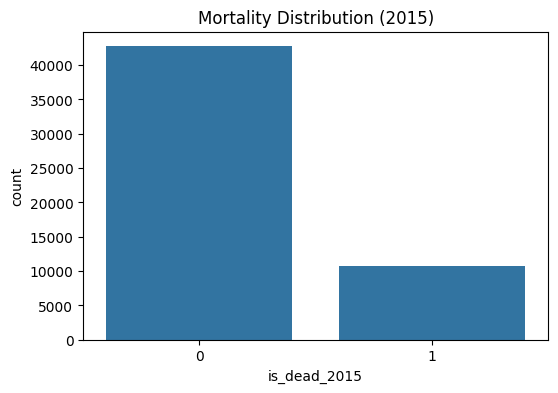

In [32]:
target = 'is_dead_2015'
if target in df.columns:
    print(f"\n=== Target Variable Distribution ({target}) ===")
    print(df[target].value_counts(normalize=True))

    # Visualize target distribution
    plt.figure(figsize=(6,4))
    sns.countplot(x=target, data=df)
    plt.title('Mortality Distribution (2015)')
    plt.show()


=== Detailed Mortality Distribution ===
              Count  Percentage (%)
is_dead_2015                       
Deceased      10716            20.0
Alive         42736            80.0

=== Detailed Mortality Distribution ===
              Count  Percentage (%)
is_dead_2015                       
Deceased      10716            20.0
Alive         42736            80.0


<ipython-input-46-00b157942079>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='mortality_status',


<Figure size 800x600 with 0 Axes>

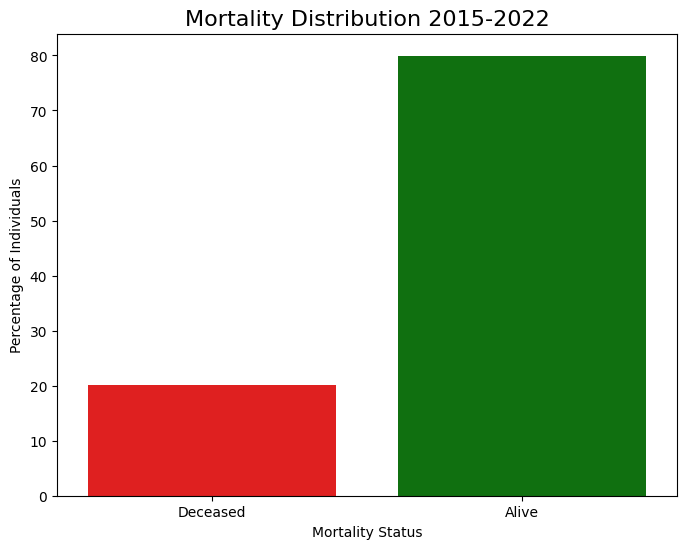

In [46]:
# Corrected Mortality Distribution Visualization with proper label alignment
if 'is_dead_2015' in df.columns:
    # Calculate counts and percentages
    mortality_counts = df['is_dead_2015'].value_counts().sort_index(ascending=False)  # Reverse order
    mortality_percent = df['is_dead_2015'].value_counts(normalize=True).sort_index(ascending=False) * 100

    print("\n=== Detailed Mortality Distribution ===")
    print(pd.DataFrame({
        'Count': mortality_counts,
        'Percentage (%)': mortality_percent.round(1)
    }).rename(index={0: 'Alive', 1: 'Deceased'}))

    # Create enhanced visualization
    plt.figure(figsize=(8, 6))

    # Define our desired order and colors
    status_order = ['Deceased', 'Alive']  # This will determine bar order
    colors = {'Alive': 'green', 'Deceased': 'red'}

    # Create a temporary mapping column
    df['mortality_status'] = df['is_dead_2015'].map({0: 'Alive', 1: 'Deceased'})
# Corrected Mortality Distribution Visualization with proper label alignment
if 'is_dead_2015' in df.columns:
    # Calculate counts and percentages
    mortality_counts = df['is_dead_2015'].value_counts().sort_index(ascending=False)  # Reverse order
    mortality_percent = df['is_dead_2015'].value_counts(normalize=True).sort_index(ascending=False) * 100

    print("\n=== Detailed Mortality Distribution ===")
    print(pd.DataFrame({
        'Count': mortality_counts,
        'Percentage (%)': mortality_percent.round(1)
    }).rename(index={0: 'Alive', 1: 'Deceased'}))

    # Create enhanced visualization
    plt.figure(figsize=(8, 6))

    # Define our desired order and colors
    status_order = ['Deceased', 'Alive']  # This will determine bar order
    colors = {'Alive': 'green', 'Deceased': 'red'}

    # Create a temporary mapping column
    df['mortality_status'] = df['is_dead_2015'].map({0: 'Alive', 1: 'Deceased'})

    # *** Pass the DataFrame 'df' to the 'data' argument ***
    ax = sns.barplot(x='mortality_status',
                     y='is_dead_2015', # Use the original column for y-axis
                     data=df,          # Pass the DataFrame
                     order=status_order,
                     estimator=lambda x: len(x) / len(df) * 100, # Calculate percentage
                     palette=colors)

    ax.set(ylabel='Percentage of Individuals', xlabel='Mortality Status')
    plt.title('Mortality Distribution 2015-2022', fontsize=16)




=== Numeric Feature Correlations ===


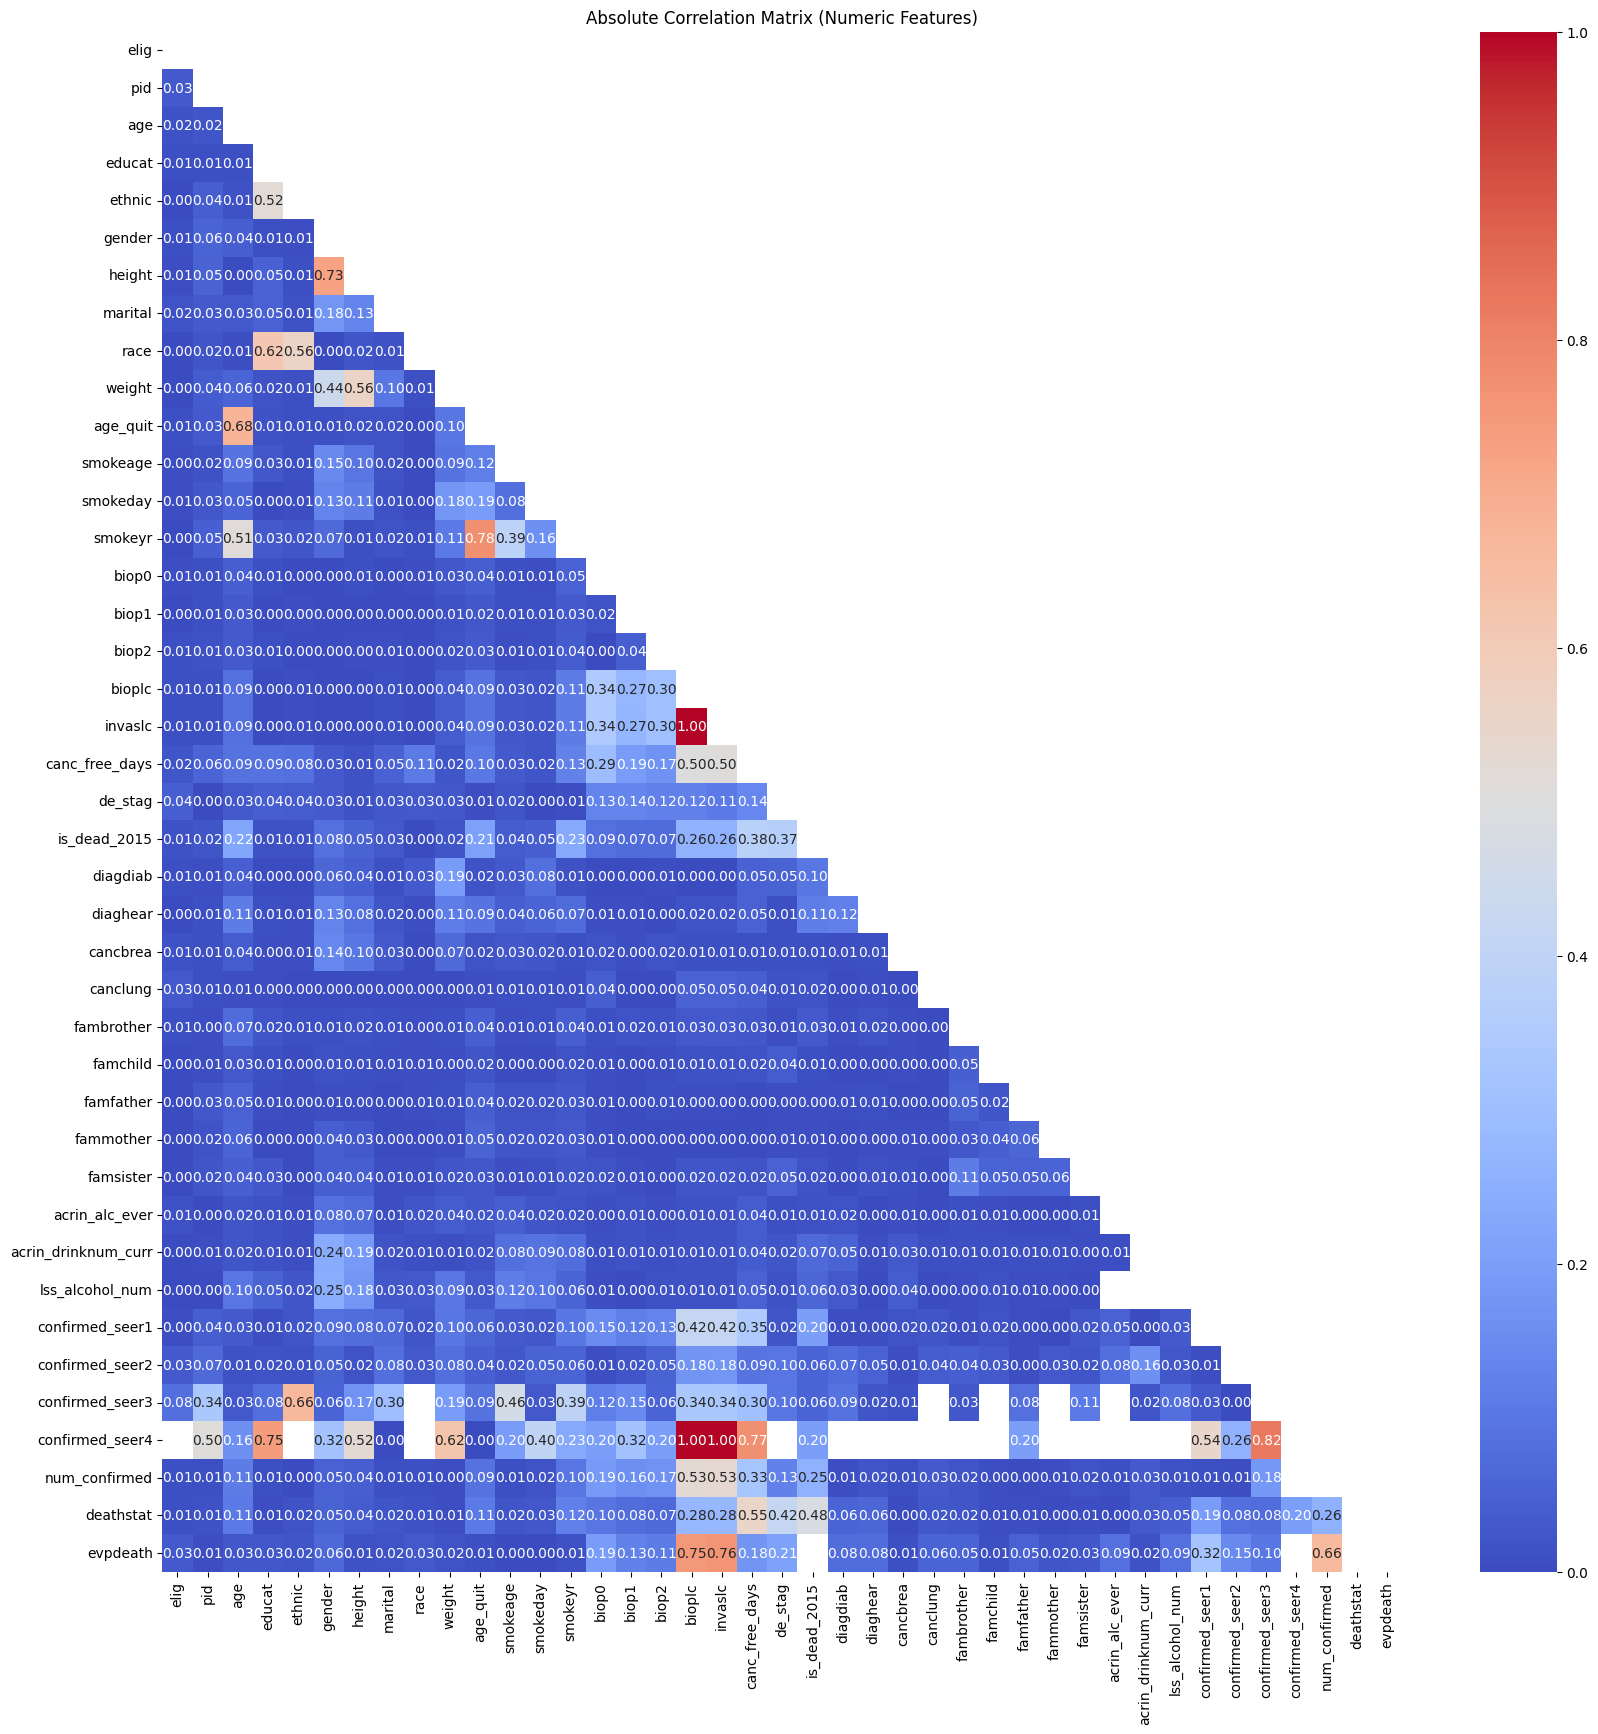


Top correlations with is_dead_2015:
is_dead_2015           1.000000
deathstat              0.482198
canc_free_days         0.376715
de_stag                0.370298
invaslc                0.257240
bioplc                 0.255612
num_confirmed          0.254678
smokeyr                0.233672
age                    0.221357
age_quit               0.206586
confirmed_seer4        0.200000
confirmed_seer1        0.199823
diaghear               0.114747
diagdiab               0.097882
biop0                  0.085410
gender                 0.082265
biop2                  0.071490
biop1                  0.071035
acrin_drinknum_curr    0.067794
lss_alcohol_num        0.061157
confirmed_seer2        0.057868
confirmed_seer3        0.056468
height                 0.054596
smokeday               0.045728
smokeage               0.036181
fambrother             0.033644
marital                0.028786
pid                    0.022441
weight                 0.020212
famsister              0.019474
can

In [49]:
# 3. Correlation Analysis (for numeric columns)
print("\n=== Numeric Feature Correlations ===")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
corr_matrix = df[numeric_cols].corr()

# Visualize top correlations
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix.abs(), annot=True, fmt=".2f",
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
            cmap='coolwarm')
plt.title('Absolute Correlation Matrix (Numeric Features)')
plt.show()

# Show top correlations with target
if target in numeric_cols:
    print(f"\nTop correlations with {target}:")
    print(corr_matrix[target].abs().sort_values(ascending=False))

In [50]:
# 4. Categorical Relationships (using chi-square tests)
categorical_cols = df.select_dtypes(include=['category','object']).columns

if len(categorical_cols) > 0:
    print("\n=== Significant Categorical Relationships ===")
    results = []
    for col in categorical_cols:
        if col != target:
            contingency_table = pd.crosstab(df[col], df[target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results.append({
                'Feature': col,
                'Chi2': chi2,
                'P-value': p,
                'Association': 'Significant' if p < 0.05 else 'Not significant'
            })

    chi2_results = pd.DataFrame(results)
    print(chi2_results.sort_values('P-value').head(10))


=== Significant Categorical Relationships ===
            Feature          Chi2  P-value  Association
0  mortality_status  53445.761378      0.0  Significant



=== Survival Analysis ===


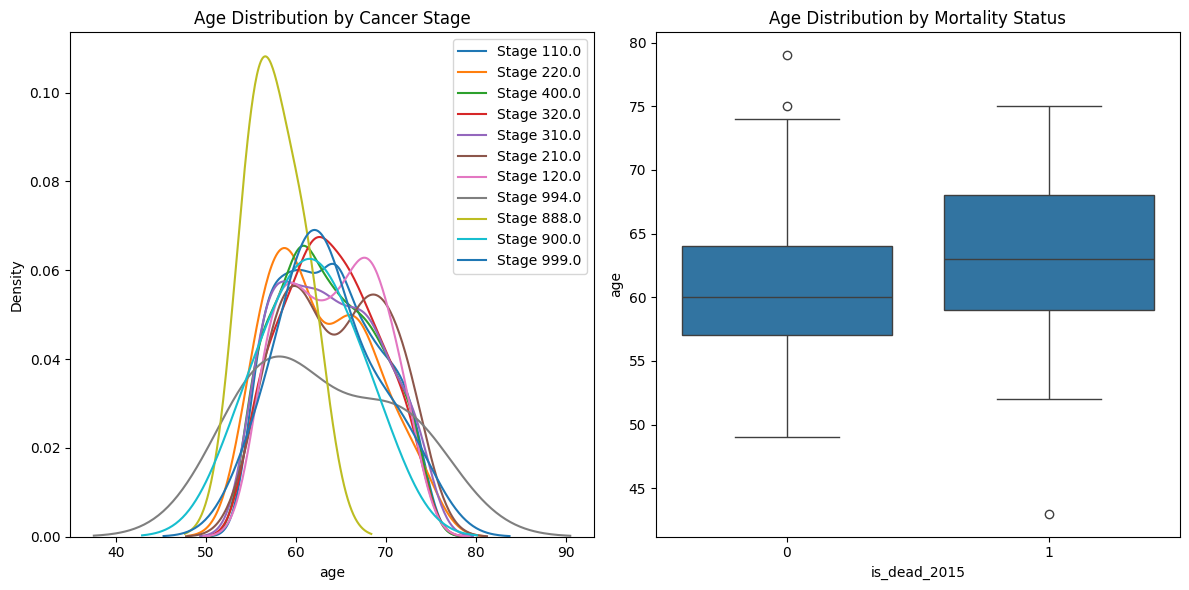

In [52]:
# 5. Advanced Analysis - Survival by Key Features
if all(col in df.columns for col in ['is_dead_2015', 'age', 'gender', 'de_stag']):
    print("\n=== Survival Analysis ===")

    # Kaplan-Meier plots by important categories
    plt.figure(figsize=(12,6))

    # By cancer stage
    plt.subplot(1,2,1)
    for stage in df['de_stag'].dropna().unique():
        mask = (df['de_stag'] == stage)
        sns.kdeplot(df.loc[mask, 'age'], label=f"Stage {stage}")
    plt.title('Age Distribution by Cancer Stage')
    plt.legend()

    # By mortality status
    plt.subplot(1,2,2)
    sns.boxplot(x='is_dead_2015', y='age', data=df)
    plt.title('Age Distribution by Mortality Status')

    plt.tight_layout()
    plt.show()



=== Predictive Patterns ===


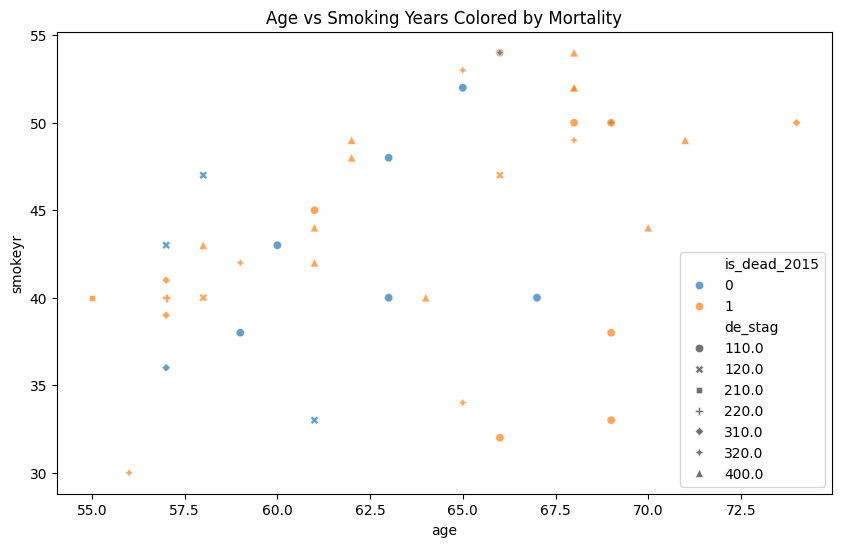

In [53]:
# 6. Predictive Relationships
if all(col in df.columns for col in ['is_dead_2015', 'age', 'smokeyr', 'de_stag']):
    print("\n=== Predictive Patterns ===")

    # Prepare a sample visualization
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='age', y='smokeyr', hue='is_dead_2015',
                    style='de_stag', data=df.sample(1000), alpha=0.7)
    plt.title('Age vs Smoking Years Colored by Mortality')
    plt.show()


=== Family Cancer History Impact ===


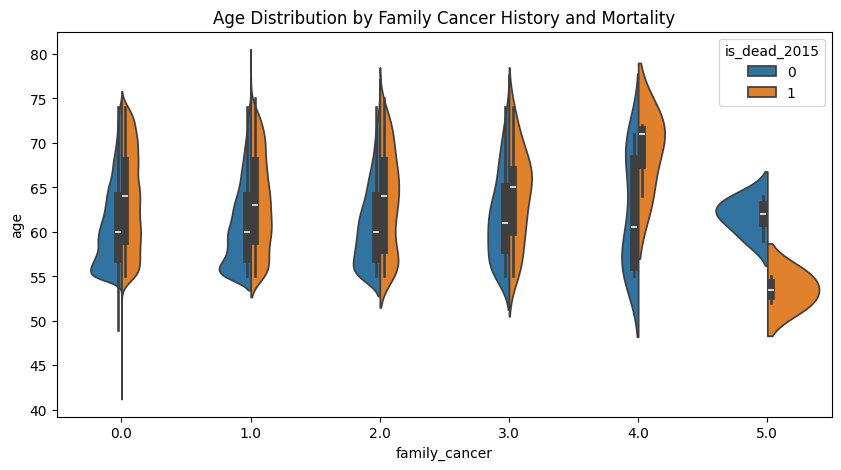

In [54]:
family_cols = ['fambrother','famchild','famfather','fammother','famsister']
if all(col in df.columns for col in family_cols):
    print("\n=== Family Cancer History Impact ===")
    df['family_cancer'] = df[family_cols].sum(axis=1)

    plt.figure(figsize=(10,5))
    sns.violinplot(x='family_cancer', y='age', hue='is_dead_2015',
                   data=df, split=True)
    plt.title('Age Distribution by Family Cancer History and Mortality')
    plt.show()

In [55]:
# 8. Alcohol Consumption Patterns
alcohol_cols = ['acrin_alc_ever','acrin_drinknum_curr','lss_alcohol_num']
if all(col in df.columns for col in alcohol_cols):
    print("\n=== Alcohol Consumption Patterns ===")

    # Create alcohol consumption indicator
    df['alcohol_consumer'] = df['acrin_alc_ever'].apply(lambda x: 1 if x == 'Yes' else 0)

    if 'is_dead_2015' in df.columns:
        alcohol_impact = df.groupby('alcohol_consumer')['is_dead_2015'].mean()
        print("\nMortality Rate by Alcohol Consumption:")
        print(alcohol_impact)


=== Alcohol Consumption Patterns ===

Mortality Rate by Alcohol Consumption:
alcohol_consumer
0    0.200479
Name: is_dead_2015, dtype: float64



=== Cancer Stage Distribution ===
Stage Code Explanations:
110: Stage IA
120: Stage IB
210: Stage IIA
220: Stage IIB
310: Stage IIIA
320: Stage IIIB
400: Stage IV
888: TNM not available
900: Occult Carcinoma
994: Carcinoid
999: Unknown

Stage Distribution Counts:
                   Count  Percentage (%)
stage_label                             
Stage IA             621            30.2
Stage IV             596            29.0
Stage IIIB           246            12.0
Stage IIIA           213            10.4
Stage IB             210            10.2
Stage IIB             79             3.8
Stage IIA             67             3.3
Unknown               13             0.6
Carcinoid              5             0.2
Occult Carcinoma       4             0.2
TNM not available      3             0.1


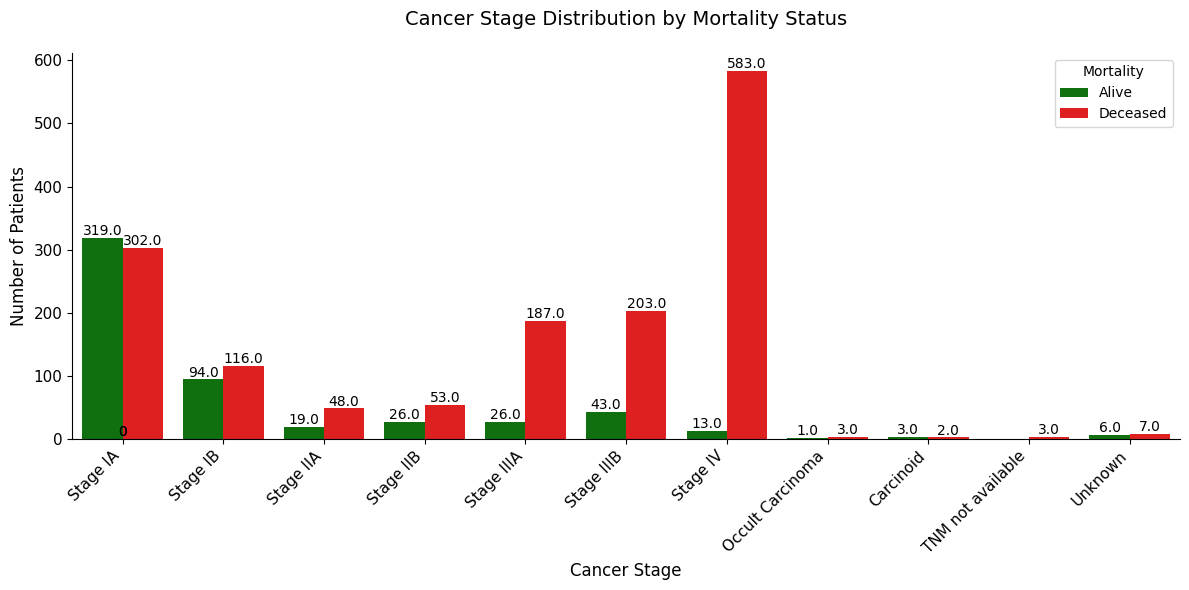

In [57]:
# Enhanced Cancer Stage Analysis with Stage Code Explanations
if 'de_stag' in df.columns:
    # Create stage code mapping dictionary
    stage_mapping = {
        110: 'Stage IA',
        120: 'Stage IB',
        210: 'Stage IIA',
        220: 'Stage IIB',
        310: 'Stage IIIA',
        320: 'Stage IIIB',
        400: 'Stage IV',
        888: 'TNM not available',
        900: 'Occult Carcinoma',
        994: 'Carcinoid',
        999: 'Unknown'
    }

    # Create a new column with readable stage labels
    df['stage_label'] = df['de_stag'].map(stage_mapping)

    print("\n=== Cancer Stage Distribution ===")
    print("Stage Code Explanations:")
    for code, description in stage_mapping.items():
        print(f"{code}: {description}")

    # Get counts and percentages
    stage_counts = df['stage_label'].value_counts()
    stage_percent = df['stage_label'].value_counts(normalize=True) * 100

    print("\nStage Distribution Counts:")
    print(pd.DataFrame({
        'Count': stage_counts,
        'Percentage (%)': stage_percent.round(1)
    }))

    # Create visualization
    plt.figure(figsize=(12, 6))

    # Create ordered list of stages for consistent plotting
    stage_order = [
        'Stage IA', 'Stage IB',
        'Stage IIA', 'Stage IIB',
        'Stage IIIA', 'Stage IIIB',
        'Stage IV',
        'Occult Carcinoma',
        'Carcinoid',
        'TNM not available',
        'Unknown'
    ]

    # Plot with mortality breakdown
    ax = sns.countplot(
        x='stage_label',
        hue='is_dead_2015',
        data=df,
        order=stage_order,
        palette={0: 'green', 1: 'red'}
    )

    # Add count labels to bars
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():,}",
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )

    # Customize plot
    plt.title('Cancer Stage Distribution by Mortality Status', fontsize=14, pad=20)
    plt.xlabel('Cancer Stage', fontsize=12)
    plt.ylabel('Number of Patients', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.legend(title='Mortality', labels=['Alive', 'Deceased'])

    # Remove top and right spines
    sns.despine()

    plt.tight_layout()
    plt.show()

<ipython-input-59-6d835513283b>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  smoking_risk = df.groupby('smoking_category')['is_dead_2015'].mean().reset_index()


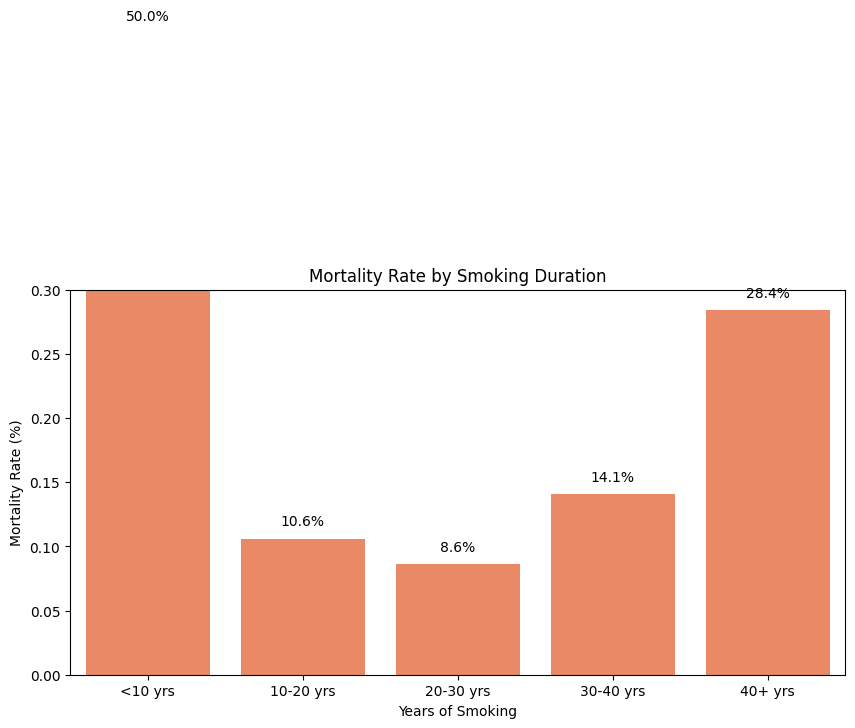

In [59]:
# 10. Smoking Impact Analysis
if all(col in df.columns for col in smoking_cols + ['is_dead_2015']):
    # Create smoking categories
    df['smoking_category'] = pd.cut(df['smokeyr'],
                                   bins=[0, 10, 20, 30, 40, 100],
                                   labels=['<10 yrs', '10-20 yrs', '20-30 yrs', '30-40 yrs', '40+ yrs'])

    # Calculate mortality rates by category
    smoking_risk = df.groupby('smoking_category')['is_dead_2015'].mean().reset_index()

    # Visualization
    plt.figure(figsize=(10,5))
    sns.barplot(x='smoking_category', y='is_dead_2015', data=smoking_risk, color='coral')
    plt.title('Mortality Rate by Smoking Duration')
    plt.xlabel('Years of Smoking')
    plt.ylabel('Mortality Rate (%)')
    plt.ylim(0, 0.3)

    # Add value labels
    for index, row in smoking_risk.iterrows():
        plt.text(index, row['is_dead_2015']+0.01,
                 f"{row['is_dead_2015']*100:.1f}%",
                 ha='center')

    plt.show()

<ipython-input-60-1b4704b41db6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['age_group', 'smoking_category'])['is_dead_2015'].mean().unstack()


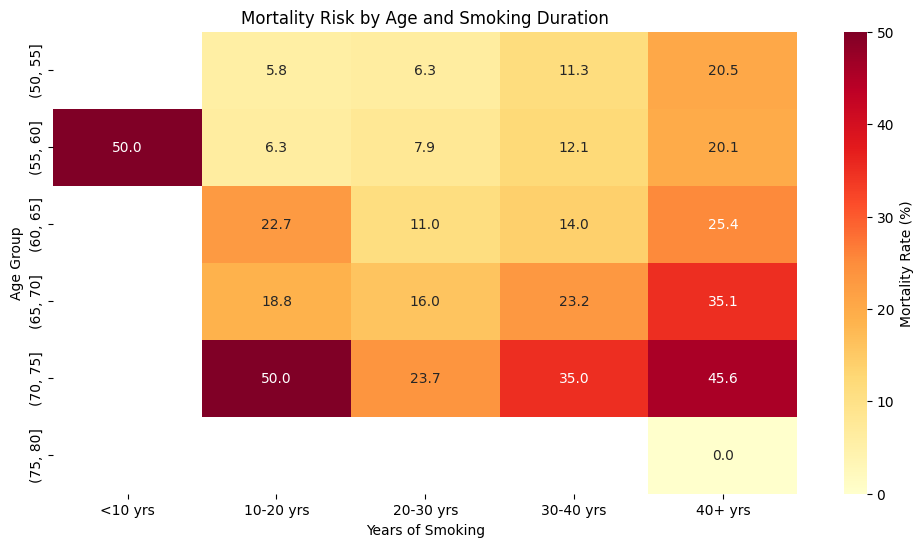

In [60]:
#Smoking Heatmap by Age and Mortality
if all(col in df.columns for col in smoking_cols + ['is_dead_2015', 'age']):
    # Create age groups
    df['age_group'] = pd.cut(df['age'], bins=range(50, 85, 5))

    # Prepare data for heatmap
    heatmap_data = df.groupby(['age_group', 'smoking_category'])['is_dead_2015'].mean().unstack()

    # Visualization
    plt.figure(figsize=(12,6))
    sns.heatmap(heatmap_data*100, annot=True, fmt=".1f", cmap="YlOrRd",
                cbar_kws={'label': 'Mortality Rate (%)'})
    plt.title('Mortality Risk by Age and Smoking Duration')
    plt.xlabel('Years of Smoking')
    plt.ylabel('Age Group')
    plt.show()

<ipython-input-65-e1040c397c80>:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=11, color='#333333')


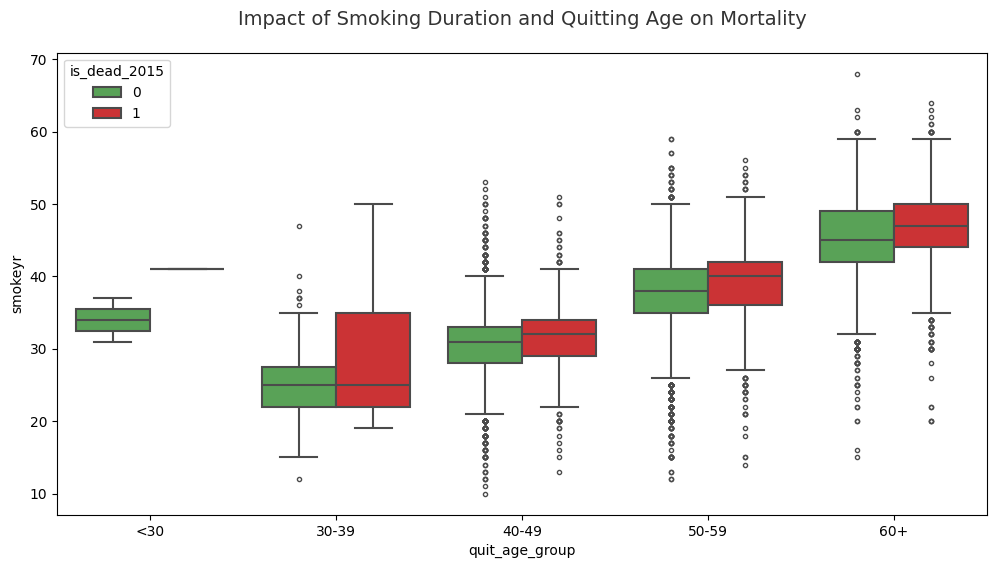

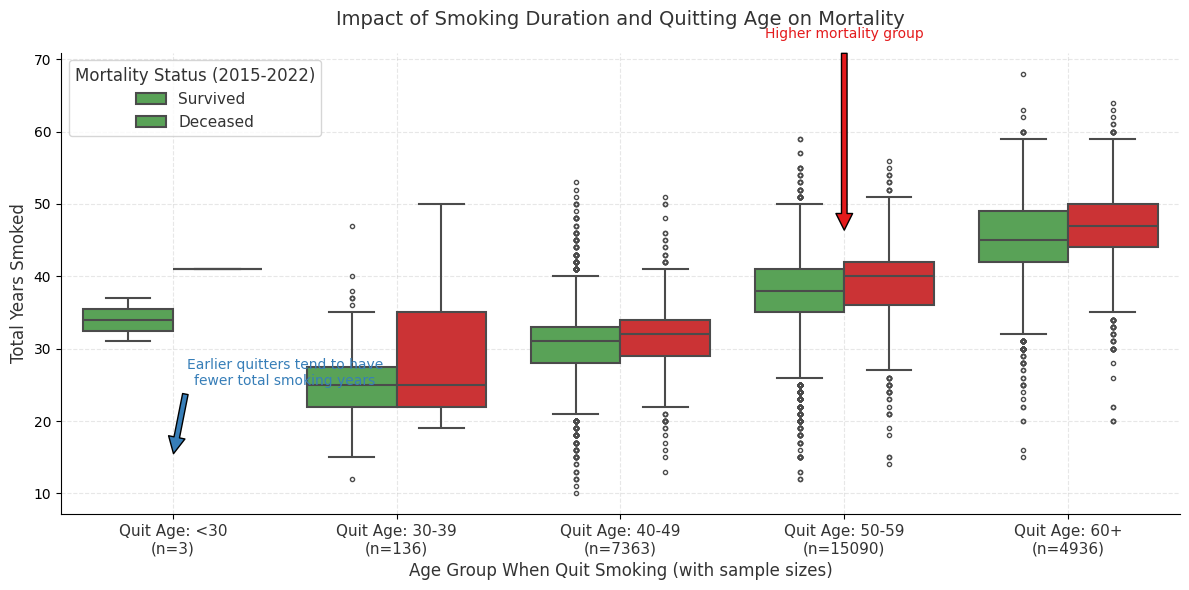

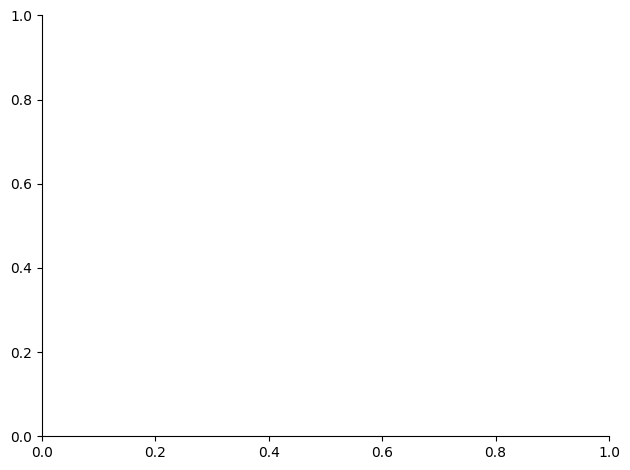

In [65]:
# Enhanced Quitting Age vs Mortality Analysis with Colored Labels
if 'age_quit' in df.columns:
    # Filter only smokers who quit and clean data
    quitters = df[df['age_quit'].notna()].copy()
    quitters['quit_age_group'] = pd.cut(quitters['age_quit'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['<30', '30-39', '40-49', '50-59', '60+'])

    # Create the plot
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='quit_age_group', y='smokeyr', hue='is_dead_2015',
                    data=quitters, palette={0: '#4daf4a', 1: '#e41a1c'},  # Green and red
                    linewidth=1.5, fliersize=3)

    # Customize title and labels with colors
    plt.title('Impact of Smoking Duration and Quitting Age on Mortality',
             fontsize=14, pad=20, color='#333333')
# Enhanced Quitting Age vs Mortality Analysis with Colored Labels
if 'age_quit' in df.columns:
    # Filter only smokers who quit and clean data
    quitters = df[df['age_quit'].notna()].copy()
    quitters['quit_age_group'] = pd.cut(quitters['age_quit'],
                                      bins=[0, 30, 40, 50, 60, 100],
                                      labels=['<30', '30-39', '40-49', '50-59', '60+'])

    # Create the plot
    plt.figure(figsize=(12, 6))
    ax = sns.boxplot(x='quit_age_group', y='smokeyr', hue='is_dead_2015',
                    data=quitters, palette={0: '#4daf4a', 1: '#e41a1c'},  # Green and red
                    linewidth=1.5, fliersize=3)

    # Customize title and labels with colors
    plt.title('Impact of Smoking Duration and Quitting Age on Mortality',
             fontsize=14, pad=20, color='#333333')

    # X-axis with colored labels
    x_labels = ['\n'.join([f"Quit Age: {age}", f"(n={len(quitters[quitters['quit_age_group']==age])})"])
               for age in ['<30', '30-39', '40-49', '50-59', '60+']]
    ax.set_xticklabels(x_labels, fontsize=11, color='#333333')

    # Y-axis with colored label
    ax.set_ylabel('Total Years Smoked', fontsize=12, color='#333333')
    ax.set_xlabel('Age Group When Quit Smoking (with sample sizes)', fontsize=12, color='#333333')

    # Custom legend with colored text
    legend = ax.legend(title='Mortality Status (2015-2022)',
                      labels=['Survived', 'Deceased'],
                      title_fontsize=12,
                      fontsize=11)
    legend.get_title().set_color('#333333')
    for text in legend.get_texts():
        text.set_color('#333333')

    # Add colored annotations
    plt.annotate('Earlier quitters tend to have\nfewer total smoking years',
                xy=(0, 15), xytext=(0.5, 25),
                arrowprops=dict(facecolor='#377eb8', shrink=0.05),
                fontsize=10, color='#377eb8', ha='center')

    plt.annotate('Higher mortality group',
                xy=(3, quitters[quitters['is_dead_2015']==1]['smokeyr'].median()+5),
                xytext=(3, quitters['smokeyr'].max()+5),
                arrowprops=dict(facecolor='#e41a1c', shrink=0.05),
                fontsize=10, color='#e41a1c', ha='center')

    # Custom grid and spines
    ax.grid(True, linestyle='--', alpha=0.3)
    sns.despine()
    plt.tight_layout()
    plt.show()

    # Y-axis with colored label
    ax.set_ylabel('Total Years Smoked', fontsize=12, color='#333333')
    ax.set_xlabel('Age Group When Quit Smoking (with sample sizes)', fontsize=12, color='#333333')

    # Custom legend with colored text
    legend = ax.legend(title='Mortality Status (2015-2022)',
                      labels=['Survived', 'Deceased'],
                      title_fontsize=12,
                      fontsize=11)
    legend.get_title().set_color('#333333')
    for text in legend.get_texts():
        text.set_color('#333333')

    # Add colored annotations
    plt.annotate('Earlier quitters tend to have\nfewer total smoking years',
                xy=(0, 15), xytext=(0.5, 25),
                arrowprops=dict(facecolor='#377eb8', shrink=0.05),
                fontsize=10, color='#377eb8', ha='center')

    plt.annotate('Higher mortality group',
                xy=(3, quitters[quitters['is_dead_2015']==1]['smokeyr'].median()+5),
                xytext=(3, quitters['smokeyr'].max()+5),
                arrowprops=dict(facecolor='#e41a1c', shrink=0.05),
                fontsize=10, color='#e41a1c', ha='center')

    # Custom grid and spines
    ax.grid(True, linestyle='--', alpha=0.3)
    sns.despine()
    plt.tight_layout()
    plt.show()


=== Gender-Specific Survival Rates ===
        count  survival_rate  mortality_rate
gender                                      
Men     31530          0.772           0.228
Women   21922          0.839           0.161


<ipython-input-71-99aa28df2d84>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_survival.index,


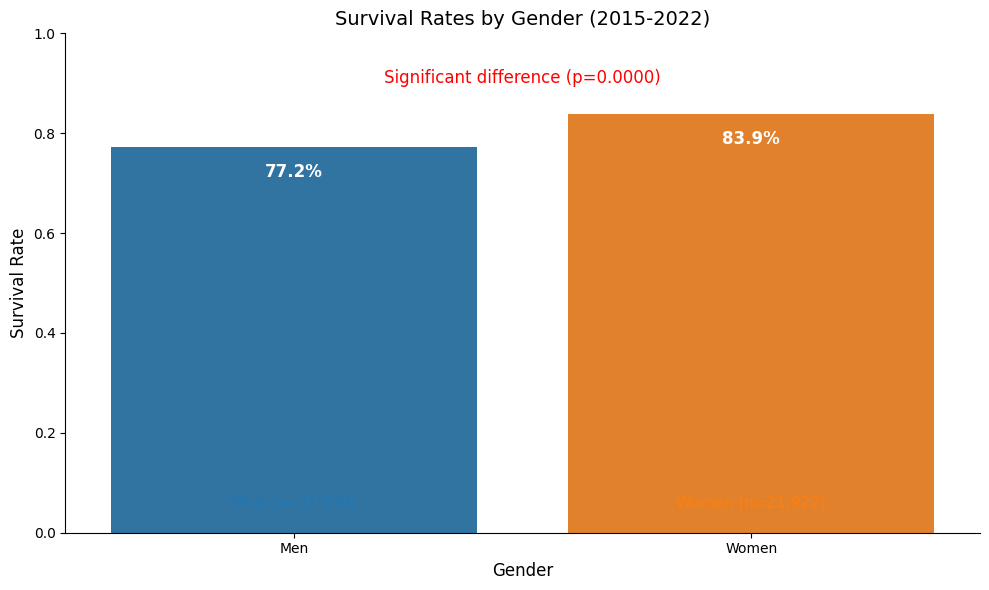

In [71]:
# Gender vs Survival Analysis
if all(col in df.columns for col in ['gender', 'is_dead_2015']):
    # Calculate survival statistics
    gender_survival = df.groupby('gender')['is_dead_2015'].agg(['mean', 'count'])
    gender_survival['survival_rate'] = 1 - gender_survival['mean']
    gender_survival['mortality_rate'] = gender_survival['mean']
    gender_survival = gender_survival.rename(index={1: 'Men', 2: 'Women'})

    print("\n=== Gender-Specific Survival Rates ===")
    print(gender_survival[['count', 'survival_rate', 'mortality_rate']].round(3))

    # Create visualization
    plt.figure(figsize=(10, 6))

    # Bar plot for survival rates
    ax = sns.barplot(x=gender_survival.index,
                    y='survival_rate',
                    data=gender_survival,
                    palette=['#1f77b4', '#ff7f0e'])  # Blue for men, orange for women

    # Add exact percentages on bars
    for i, rate in enumerate(gender_survival['survival_rate']):
        ax.text(i, rate-0.05, f"{rate*100:.1f}%",
               ha='center', va='center',
               color='white', fontsize=12, fontweight='bold')

    # Customize plot
    plt.title('Survival Rates by Gender (2015-2022)', fontsize=14)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Survival Rate', fontsize=12)
    plt.ylim(0, 1)

    # Add sample size information
    plt.annotate(f"Men (n={gender_survival.loc['Men', 'count']:,})",
                xy=(0, 0.05), xytext=(0, 0.05),
                fontsize=11, color='#1f77b4', ha='center')
    plt.annotate(f"Women (n={gender_survival.loc['Women', 'count']:,})",
                xy=(1, 0.05), xytext=(1, 0.05),
                fontsize=11, color='#ff7f0e', ha='center')

    # Add statistical comparison if significant
    from scipy.stats import chi2_contingency
    contingency_table = pd.crosstab(df['gender'], df['is_dead_2015'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    if p < 0.05:
        plt.annotate(f"Significant difference (p={p:.4f})",
                    xy=(0.5, 0.9), xytext=(0.5, 0.9),
                    fontsize=12, color='red', ha='center')
    else:
        plt.annotate(f"No significant difference (p={p:.4f})",
                    xy=(0.5, 0.9), xytext=(0.5, 0.9),
                    fontsize=12, color='green', ha='center')

    sns.despine()
    plt.tight_layout()
    plt.show()

<ipython-input-85-773771b6cb42>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender = df.groupby(['age_group', 'gender'])['is_dead_2015'].mean().unstack()


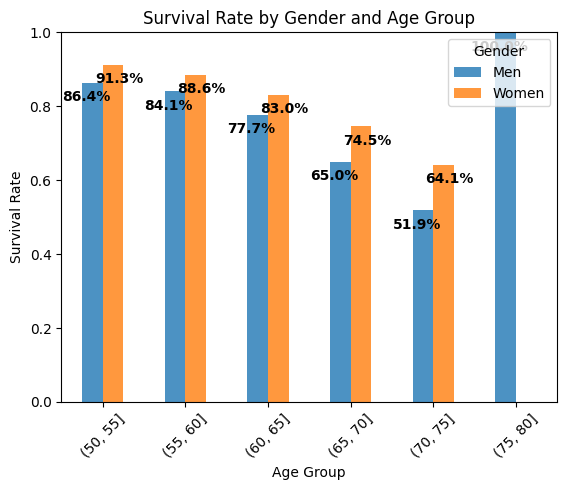

In [85]:
# 2. Gender x Age Group Breakdown
age_gender = df.groupby(['age_group', 'gender'])['is_dead_2015'].mean().unstack()
age_gender = 1 - age_gender  # Convert to survival rate

# Rename columns to 'Men' and 'Women'
age_gender = age_gender.rename(columns={1: 'Men', 2: 'Women'})

age_gender.plot(kind='bar', color=['#1f77b4', '#ff7f0e'], alpha=0.8) # ax=plt.gca() is removed
plt.title('Survival Rate by Gender and Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.ylim(0, 1)

# Add value labels
for i, age in enumerate(age_gender.index):
    # Access columns using their labels ('Men', 'Women')
    plt.text(i - 0.2, age_gender.loc[age, 'Men'] - 0.05,
             f"{age_gender.loc[age, 'Men']:.1%}",
             ha='center', color='black', fontweight='bold')
    plt.text(i + 0.2, age_gender.loc[age, 'Women'] - 0.05,
             f"{age_gender.loc[age, 'Women']:.1%}",
             ha='center', color='black', fontweight='bold')

# Added to call plot
plt.show()

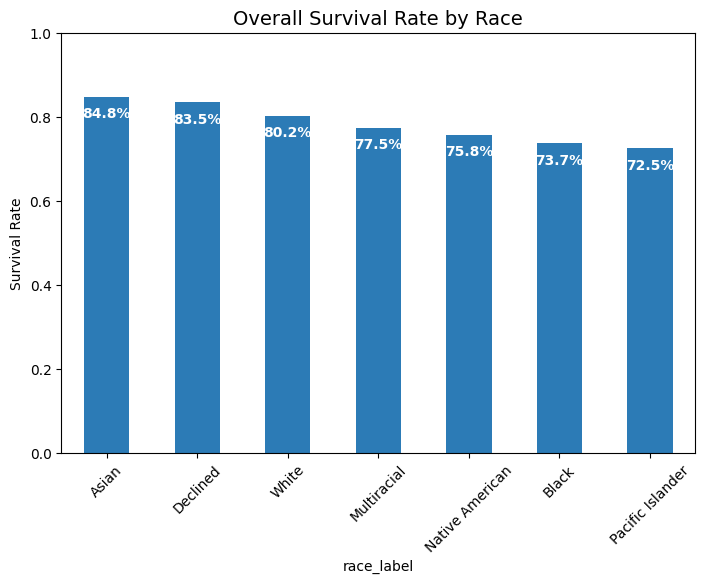

In [88]:
# Race-Specific Survival Analysis with Demographic Breakdowns
if all(col in df.columns for col in ['race', 'is_dead_2015', 'gender', 'age']):

    # Create race labels (using the codes from your data dictionary)
    race_labels = {
        1: 'White',
        2: 'Black',
        3: 'Asian',
        4: 'Native American',
        5: 'Pacific Islander',
        6: 'Multiracial',
        7: 'Declined'
    }

    # Create age groups
    df['age_group'] = pd.cut(df['age'],
                           bins=[50, 60, 70, 80, 100],
                           labels=['50-59', '60-69', '70-79', '80+'])

    # Apply race labels
    df['race_label'] = df['race'].map(race_labels)

    # Filter out small racial groups (sample size < 100)
    race_counts = df['race_label'].value_counts()
    valid_races = race_counts[race_counts >= 100].index
    race_df = df[df['race_label'].isin(valid_races)]

    # 1. Overall Survival by Race
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    race_survival = 1 - race_df.groupby('race_label')['is_dead_2015'].mean()
    race_survival.sort_values(ascending=False).plot(kind='bar', color='#2c7bb6')

    # Add value labels
    for i, v in enumerate(race_survival.sort_values(ascending=False)):
        plt.text(i, v-0.05, f"{v:.1%}",
                ha='center', color='white', fontweight='bold')

    plt.title('Overall Survival Rate by Race', fontsize=14)
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

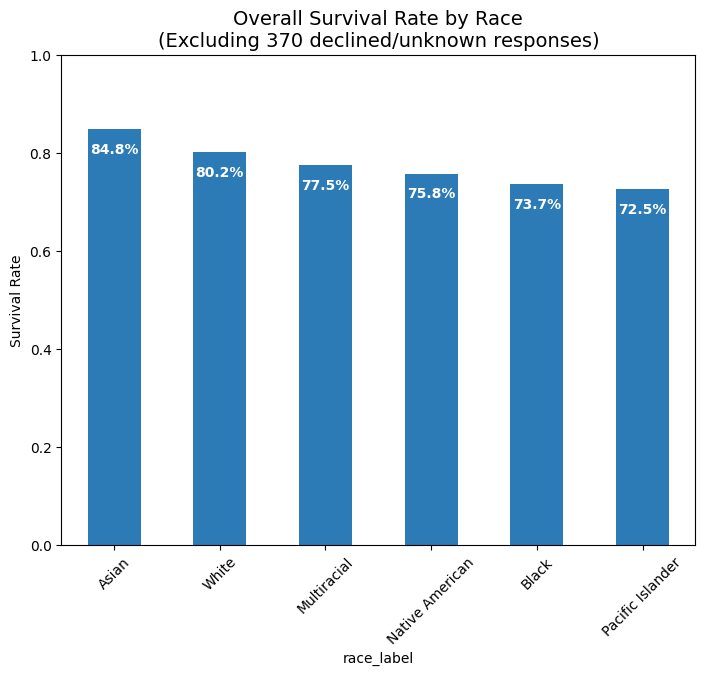

In [89]:
# Enhanced Race and Ethnicity Survival Analysis
if all(col in df.columns for col in ['race', 'ethnic', 'is_dead_2015', 'gender', 'age']):

    # Create race labels (excluding declined responses)
    race_labels = {
        1: 'White',
        2: 'Black',
        3: 'Asian',
        4: 'Native American',
        5: 'Pacific Islander',
        6: 'Multiracial'
        # Excluded 7: 'Declined' as per request
    }

    # Create ethnicity labels
    ethnic_labels = {
        1: 'Hispanic/Latino',
        2: 'Not Hispanic/Latino'
    }

    # Create age groups
    df['age_group'] = pd.cut(df['age'],
                           bins=[50, 60, 70, 80, 100],
                           labels=['50-59', '60-69', '70-79', '80+'])

    # Apply labels and filter
    df['race_label'] = df['race'].map(race_labels)
    df['ethnic_label'] = df['ethnic'].map(ethnic_labels)

    # Filter out small groups and declined responses
    race_counts = df['race_label'].value_counts()
    valid_races = race_counts[race_counts >= 100].index
    analysis_df = df[df['race_label'].isin(valid_races)]

    # Count declined/unknown race responses (for footnote)
    declined_race = len(df[~df['race'].isin(race_labels.keys())])

    # 1. Overall Survival by Race
    plt.figure(figsize=(18, 14))

    plt.subplot(2, 2, 1)
    race_survival = 1 - analysis_df.groupby('race_label')['is_dead_2015'].mean()
    race_survival.sort_values(ascending=False).plot(kind='bar', color='#2c7bb6')

    # Add value labels
    for i, v in enumerate(race_survival.sort_values(ascending=False)):
        plt.text(i, v-0.05, f"{v:.1%}",
                ha='center', color='white', fontweight='bold')

    plt.title('Overall Survival Rate by Race\n(Excluding {} declined/unknown responses)'.format(declined_race),
             fontsize=14)
    plt.ylabel('Survival Rate')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

(0.0, 1.0)

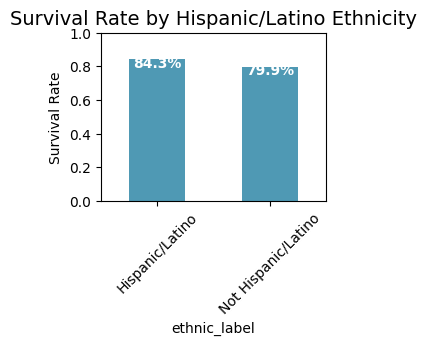

In [91]:
# 2. Ethnicity (Hispanic/Latino) Analysis
plt.subplot(2, 2, 2) # Removed extra indentation here
ethnic_survival = 1 - analysis_df.groupby('ethnic_label')['is_dead_2015'].mean()
ethnic_survival.plot(kind='bar', color='#4f99b4')

# Add value labels
for i, v in enumerate(ethnic_survival):
    plt.text(i, v-0.05, f"{v:.1%}",
            ha='center', color='white', fontweight='bold')

plt.title('Survival Rate by Hispanic/Latino Ethnicity', fontsize=14)
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)